
# Demostración BlockPower: Edificios de Nueva York

Las principales secciones de este trabajo son:
1. [Acceso a Datos](#1.-Acceso-a-Datos)
2. [Model energy usage in kWh of buildings](#2.-Model-energy-usage-in-kWh-of-buildings)
3. [Detect buildings that consume energy inefficiently](#3.-Detect-buildings-that-consume-energy-inefficiently)
4. [Export data and models to RStudio](#4.-Export-data-and-models-to-RStudio)

El trabajo utilizó como referencia el siguiente artículo *MODELING AND SIMULATION OF BUILDING ENERGY PERFORMANCE FOR 
PORTFOLIOS OF PUBLIC BUILDINGS*: [this article](http://www.informs-sim.org/wsc11papers/082.pdf) por un grupo de investigadores de:
+ IBM T.J. Watson Research Center, 
+ CUNY Institute for Urban Systems and 
+ McMaster University. 


# 1. Acceso a Datos
+ Datos de BlocPower
+ Datos públicos de consumo energético de calefacción y aire acondicionado de la ciudad de Nueva York


Primero haga click en el ícono "1001" para abrir el panel de datos en la esquina superior derecha de DSX:
<div><img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/dataicon.png" width=100 align="left"
/></div>

### Click in empty cell below and insert BlocPower_T.csv as Spark SQL DataFrame

<img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/loadBlocPower_T.gif"  />

---

In [1]:
# The code was removed by DSX for sharing.

[Row(UTSUM_Electricity_Usage=u'117,870 kWh', INFO_Year of Construction=u'1955', INFO_Number of Stories=4, INFO_Total Square Feet=u'14,600', PLEI_1_Quantity=1, PLEI_3_Quantity=u'2'),
 Row(UTSUM_Electricity_Usage=u'16,207 kWh', INFO_Year of Construction=u'1940', INFO_Number of Stories=1, INFO_Total Square Feet=u'600', PLEI_1_Quantity=1, PLEI_3_Quantity=u''),
 Row(UTSUM_Electricity_Usage=u'15,564 kWh', INFO_Year of Construction=u'1920', INFO_Number of Stories=2, INFO_Total Square Feet=u'6,000', PLEI_1_Quantity=2, PLEI_3_Quantity=u'1'),
 Row(UTSUM_Electricity_Usage=u'25,851 kWh', INFO_Year of Construction=u'1965', INFO_Number of Stories=1, INFO_Total Square Feet=u'5,000', PLEI_1_Quantity=6, PLEI_3_Quantity=u'1'),
 Row(UTSUM_Electricity_Usage=u'32,343 kWh', INFO_Year of Construction=u'1930', INFO_Number of Stories=3, INFO_Total Square Feet=u'4,196', PLEI_1_Quantity=1, PLEI_3_Quantity=u'1')]

In [2]:
bmos.url('demo2', 'BlocPower_T.csv')

'swift2d://demo2.os_0e91aafe1f2d4b0cb182146652903b70_configs/BlocPower_T.csv'

--- 

### ^^ Make sure the dataset at the end is called df_data_1

<div> <img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/df_data_1.png" width=600 align="left" /></div>

---



<img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/insertHDD_Features.gif" />

---

In [3]:

df_data_2 = sqlContext.read.format('com.databricks.spark.csv')\
  .options(header='true', inferschema='true')\
  .load(bmos.url('demo2', 'HDD-Features.csv'))
df_data_2.take(5)


[Row(domestic_gas=0.096226455, heating_gas=0.366193236),
 Row(domestic_gas=0.322599638, heating_gas=0.57959223),
 Row(domestic_gas=0.032705972, heating_gas=0.036460695),
 Row(domestic_gas=0.02750427, heating_gas=0.23466382),
 Row(domestic_gas=0.322599638, heating_gas=0.57959223)]

--- 

### ^^ Make sure the dataset at the end is called df_data_2

<div> <img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/df_data_2.png" width=600 align="left" /></div>

---


<img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/insertCDDHDD.gif" />


---

In [4]:

df_data_3 = sqlContext.read.format('com.databricks.spark.csv')\
  .options(header='true', inferschema='true')\
  .load(bmos.url('demo2', 'CDD-HDD-Features.csv'))
df_data_3.take(5)


[Row(Property Name=u'ChurchofStCeciliaReport', plug_load_consumption=11.65140596, ac_consumption=0.983531348, domestic_gas=0.096226455, heating_gas=0.366193236),
 Row(Property Name=u'69thLaneStudio', plug_load_consumption=32.76988438, ac_consumption=5.008371873, domestic_gas=0.322599638, heating_gas=0.57959223),
 Row(Property Name=u'UnitarianChurchofStatenIsland', plug_load_consumption=2.345049272, ac_consumption=0.296133819, domestic_gas=0.032705972, heating_gas=0.036460695),
 Row(Property Name=u'SSolowayandSonsPIPPrinting', plug_load_consumption=4.618817159, ac_consumption=0.765188561, domestic_gas=0.02750427, heating_gas=0.23466382),
 Row(Property Name=u'SunnysideJewishCenterReport', plug_load_consumption=9.323896186, ac_consumption=1.23432624, domestic_gas=0.322599638, heating_gas=0.57959223)]

--- 

### ^^ Make sure the dataset at the end is called df_data_3

<div> <img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/df_data_3.png" width=600 align="left" /></div>

#### Ahora le cambiamos el nombre a los sets de datos:

In [5]:
df2 = df_data_1   #BlocPower_T.csv
dfHDD = df_data_2 #HDD-Features.csv
dfCH = df_data_3  #CDD-HDD-Features.csv

## Importamos las librerías de Spark y Python
+ La librería numpy de Python es una biblioteca de funciones matemáticas de alto nivel, que extienden las capacidades de programación, dando mayor soporte para vectores o matrices.
+ La librería pandas de Python facilita la manipulación de datos y los análisis.
+ La librería pyspark es la aplicación de Python para el uso de Spark, en este caso se importa el módulo pyspark.sql.functions con el cual podremos definir funciones a aplicar utilizando Spark. Lo llamamos udf al ser "User defined functions". Adicionalmente del módulo pyspark.sql.types garantizamos usar el formato de datos Double, con el cual haremos cálculos con números con alta precisión (64 bits de memoria).

In [6]:
import numpy as np
import pandas as pd
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# 2. Modelo para el gasto energético de los edificios
#### Se busca crear un modelo de regresión lineal para tener idea de la relación que existe entre las distintas variables y el consumo de energía. Se realiza:
+ [Preparación de los datos](##Preparación-de-los-datos) para crear las variables o ajustar el formato
+ [Imputación de datos faltantes](##Imputación-de-datos-faltantes)
+ Análisis de correlaciones entre variables
+ Modelo de regresión lineal
+ Análisis del ajuste del modelo


## Se inspeccionan las primeras filas de los datos de BlocPower
+ UTSUM_Electricity_Usage:Consumo energético anual del edificio en kWh
+ INFO_Year of Construction: Año en el que fue construido el edificio
+ INFO_Number of Stories: Número de pisos del edificio
+ INFO_Total Square Feet: Área del edificio en pies cuadrados
+ PLEI_1_Quantity: Cantidad de dispositivos conectados(por ejemplo microondas, computadores, etc.)
+ PLEI_3_Quantity: Otro tipo de dispositivos conectados

In [7]:
df2.show(5)

+-----------------------+-------------------------+----------------------+----------------------+---------------+---------------+
|UTSUM_Electricity_Usage|INFO_Year of Construction|INFO_Number of Stories|INFO_Total Square Feet|PLEI_1_Quantity|PLEI_3_Quantity|
+-----------------------+-------------------------+----------------------+----------------------+---------------+---------------+
|            117,870 kWh|                     1955|                     4|                14,600|              1|              2|
|             16,207 kWh|                     1940|                     1|                   600|              1|               |
|             15,564 kWh|                     1920|                     2|                 6,000|              2|              1|
|             25,851 kWh|                     1965|                     1|                 5,000|              6|              1|
|             32,343 kWh|                     1930|                     3|                

## Preparación de los datos
+ En la primera columna, el consumo energético se debe modificar eliminando la coma (,) y quitando las unidades. Por ejemplo el primer dato de berá pasar de 117,870 kWh a 117870
+ En la cuarta columna se deberán eliminar las comas(,).
+ Se evidencia la existencia de valores faltantes

## Se definen las funciones para limpiar y preparar los datos
+ Se crea una función en Python para cada variable
+ Se utiliza la función en Python para crear la función para Spark

In [8]:
# Se definen funcinoes para limpiar datos
def energy(v): # Función para preparar datos de consumo energético
    v = v.encode('ascii','ignore').split(' ')[0].replace(',','')
    return np.nan if(v=='') else float(v)
def age(v): # Creación de la variable edad a partir de la fecha de construcción. Al tenerse valores del 2016, se utiliza esta fecha para calcular la edad
    v = v.encode('ascii','ignore')
    return 2016.0-float(v) if(len(v)==4) else np.nan
def stories(v):
    return float(v)
def sqFeet(v): # Se eliminan las comas de la variable área
    v = v.encode('ascii','ignore').replace(',','')
    return np.nan if(v=='') else float(v) 
def plei(v): # En las variables de cantidad de equipo conectado, se cambian valores faltantes por 0 al conocer la base de datos
    try:
        vv = float(v)
    except:
        vv = 0.0
    return vv 
# Se definen las funciones definidas por el usuario para poderlas aplicar sobre el set de datos de Spark
udfEnergy = udf(energy, DoubleType())
udfAge = udf(age, DoubleType())
udfStories = udf(stories, DoubleType())
udfSqFeet = udf(sqFeet, DoubleType())
udfPlei = udf(plei, DoubleType())

## Se aplican las funciones para preparar los datos y se modifica el nombre de las variables

In [9]:
dfN = df2.withColumn("UTSUM_Electricity_Usage", udfEnergy("UTSUM_Electricity_Usage")) \
         .withColumn("INFO_Year of Construction", udfAge("INFO_Year of Construction")) \
         .withColumn("INFO_Number of Stories", udfStories("INFO_Number of Stories")) \
         .withColumn("INFO_Total Square Feet", udfSqFeet("INFO_Total Square Feet")) \
         .withColumn("PLEI_1_Quantity", udfPlei("PLEI_1_Quantity")) \
         .withColumn("PLEI_3_Quantity", udfPlei("PLEI_3_Quantity")).cache()
dfN = dfN.withColumnRenamed("UTSUM_Electricity_Usage","energy") \
           .withColumnRenamed("INFO_Year of Construction","age") \
           .withColumnRenamed("INFO_Number of Stories","number_stories") \
           .withColumnRenamed("INFO_Total Square Feet","square_feet") \
           .withColumnRenamed("PLEI_1_Quantity","plei_1") \
           .withColumnRenamed("PLEI_3_Quantity","plei_3")            

## Imputación de datos faltantes
+ Se imputan los datos utilizando la media

In [10]:
# Se calcula la media con los valores no faltantes de energía y edad.
energy_mean = np.nanmean(np.asarray(dfN.select("energy").rdd.map(lambda r: r[0]).collect()))
age_mean = np.nanmean(np.asarray(dfN.select("age").rdd.map(lambda r: r[0]).collect()))
# Se imputan los valores faltantes con la media calculada
dfN = dfN.na.fill({"energy": energy_mean, "age": age_mean})

In [11]:
# Se define un set de datos de Spark a ser guardado en el almacenamiento de objetos
dfOut = dfN.select('energy', 'age', 'number_stories','square_feet','plei_1','plei_3')

## Se crea el set de datos de las características de los edificios

In [12]:
# Se utiliza la función .toPandas() para pasar el set de datos de Spark a una tipo pandas
# Se realiza para las caracteríticas y el set de datos de consumo de gas
dfNp = dfN.toPandas()
dfHDDp = dfHDD.toPandas()
# se concatenan los dos sets de datos tipo pandas para unificarlos
feat = pd.concat([dfNp, dfHDDp], axis=1)
# Se obtienen los nombres de las columnas del nuevo set de datos
cols = feat.columns
# Se escalan los datos para prepararlos para la regresión lineal, de tal forma se puedan comparar en la misma escala en los gráficos de correlación
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler() 
feat = scaler.fit_transform(feat)
# Se crea un nuevo set de datos con los datos escalados
dfScaled = pd.DataFrame(feat,columns=cols)

## Análisis de correlaciones
+ Se crea una matriz de gráficos de correlación entre las variables.
+ Se busca encontrar tendencias o correlaciones fuertes entre variables para descartar posibilidad de multicolinealidad en el análisis

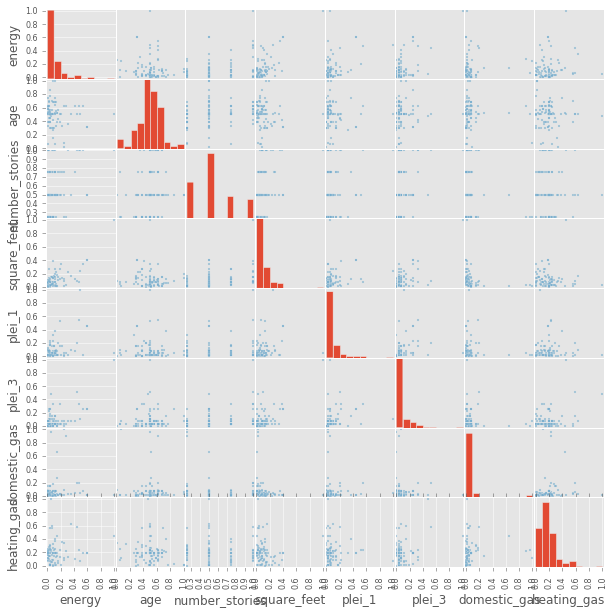

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
ff = pd.tools.plotting.scatter_matrix(dfScaled, diagonal='hist',figsize=(10,10))

## Modelo de regresión lineal

Hipótesis: El consumo de energía se puede explicar a partir de las características de los edificios:
+ Edad del edificio
+ Área
+ Número de pisos
+ Cantidad de equipo conectado
+ Consumo de gas doméstico
+ Consumo de gas para calefacción

In [14]:
# Se crea una lista con el nombre de las variables. Se separa la variable objetivo de las explicativas
features = dfScaled.columns.tolist()
response = ['energy']
features.remove(response[0])
# Se importa el solver de regresión
from sklearn import linear_model
# Se declara el modelo de regresión lineal
lr = linear_model.LinearRegression(fit_intercept=True)
# Se define la variable respuesta
y = np.asarray(dfScaled[response]) 
# Se definen las variables explicativas
X = dfScaled[features]
# Se ajusta el modelo de regresión lineal
regr = lr.fit(X,y)
coefs = regr.coef_[0]
# Se toman los coeficientes de regresión
dataRegQ = []
dataRegQ.append(('Intercept', regr.intercept_[0]))
for i in range(len(features)):
    dataRegQ.append((features[i],coefs[i]))
# Se realizan predicciones utilizando los datos que tenemos    
yh = regr.predict(X)
# Importamos paquete para calcular el R2 del modelo
from sklearn.metrics import r2_score
# Imprimimos los resultados
print 'R-Squared: ', r2_score(y,yh)
pd.DataFrame(dataRegQ,columns=['feature_name','coefficient']) #.head()

R-Squared:  0.71750454564


,feature_name,coefficient
0,Intercept,-0.067143
1,age,-0.023500
2,number_stories,0.048774
3,square_feet,0.777122
4,plei_1,0.312308
5,plei_3,0.122954
6,domestic_gas,0.229171
7,heating_gas,0.143661


## Análisis del ajuste del modelo
+ Los puntos azules representan el valor observado versus el calculado con el modelo del set de datos de entreamiento
+ La linea discontinua negra a 45° representa donde deberían estar los puntos de ser perfecto el modelo
+ Entre más cerca estén los datos azules a la linea negra, mejor predice el modelo.

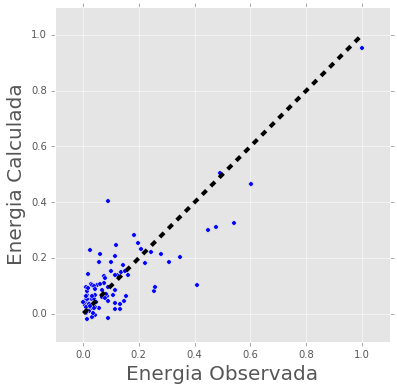

In [15]:
fig, ax = plt.subplots()
ax.scatter(y, yh)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Energia Observada',fontsize=20)
ax.set_ylabel('Energia Calculada',fontsize=20)
ax.axis([-0.1, 1.1, -0.1, 1.1])
plt.gcf().set_size_inches( (6, 6) )
plt.show()

# 3. Detectar edificios que consumen energía de forma ineficiente

## Características de consumo de los sistemas de calefacción y aire acondicionado de los edificios

In [16]:
dfCH = dfCH.toPandas()
# Tomar únicamente las 4 variables de consumo, sin el nombre de la edificación
dfR = dfCH[['plug_load_consumption','ac_consumption','domestic_gas','heating_gas']]
# Se escalan las características con su valor  máximo
dfN = dfR/dfR.max()
# Se concatenan las características escaladas con los nombres
dfCH_n = pd.concat((dfN, dfCH['Property Name']),1)

## Detectar los edificios que consumen energía de forma ineficiente
Según:
+ Aire acondicionado
+ Equipo conectado
+ Gas para uso doméstico
+ Gas para calefacción

Por ejemplo, los siguientes edificios son los más ineficientes por consumo de aire acondicionado:

In [17]:
cname = 'ac_consumption' #'heating_gas'
dfCH_n[dfCH_n[cname]>dfCH_n.quantile(0.95)[0]][['Property Name',cname]]

,Property Name,ac_consumption
84,CAAABagels,0.997882
86,PaninicoCafeReport,1.000000
87,Curran'sSuperiorMeatsReport,0.717030


## Detección de edificios ineficientes
Con el fin de no detectar únicamente los edificios según cada una de las 4 variables de forma independiente, sino poder aprovecharlas todas para hacer la clasificación, se realizará un análisis de segmentación multivariable.

Utilizando como variables:
+ Aire acondicionado
+ Equipo conectado
+ Gas para uso doméstico
+ Gas para calefacción

## Segmentación de edificios según su consumo energético por medio de la técnia K - Medias
+Se toman las 4 variables originales, y se crea un análisis de componentes principales con 4 componentes, las cuales serán utilizadas como variables entrada para el análisis de K-Medias. Se realiza previamente el análisis de componentes principales para que las nuevas variables representan las direcciones de máxima variabiliad de los datos, y así facilitar a la técnica K-Medias agrupar los individuos según su criterio de distancia.

In [18]:
# Importar librería de K-Medias y PCA de sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Declarar modelo PCA con 4 componentes
pca = PCA(n_components=2)
pca.fit(dfN)
featReduced = pca.fit_transform(dfN)
# Declarar el modelo de K-Medias con 4 segmentos 
kmeans = KMeans(n_clusters=4, tol=0.00001, random_state=1)
# Correr el modelo con los datos
kmeans.fit(featReduced)
# Darle un segmento a cada edificio
labels = kmeans.predict(featReduced)
buildings = np.asarray(dfCH['Property Name'].values.tolist())

## Gráfica con dos de las cuatro dimensiones y los segmentos calculados según el color 

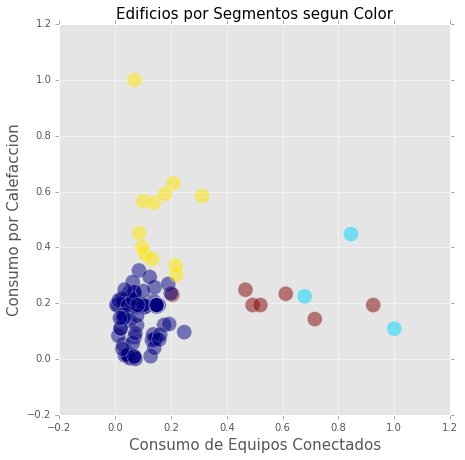

In [19]:
# 4 variables originales entre las cuales escoger: ['plug_load_consumption','ac_consumption','domestic_gas','heating_gas']
x = dfCH_n['plug_load_consumption'] 
y = dfCH_n['heating_gas'] 
plt.scatter(x, y, s=225, c=labels, alpha=0.5)
plt.gcf().set_size_inches( (7, 7) )
plt.xlabel('Consumo de Equipos Conectados',fontsize=15)
plt.ylabel('Consumo por Calefaccion',fontsize=15)
tt = 'Edificios por Segmentos segun Color' 
plt.title(tt,fontsize=15)
plt.show()

## Identificación de edificios ineficientes a partir de modelo de segmentación

+ Al notar los 4 clusters, se observa que los edificios que componen el azul oscuro son edificios eficientes.
+ Aquellos edificios de los clusters marrón, azul claro y amarillo son más ineficientes que los de color azul oscuro, por lo cual se agruparán en la categoría ineficiente.
+ Son modificados los nombres de los clusters, dándole el número 1 a aquellos ineficientes y 0 en caso contrario.

In [20]:
# Se define variable binaria para identificar edificios ineficientes.
label_binary = []
for v in labels:
    label_binary.append(0 if (v == 0) else 1)
label_binary = np.asarray(label_binary)

## Modelo de Regresión Logística para la Clasificación de edificios ineficientes

In [21]:
# Se declara el modelo de regresión logística 
log = linear_model.LogisticRegression(tol = 0.00001, max_iter = 100)
# Se ajusta el modelo con los datos 
log.fit(featReduced, label_binary)
# Se calcula la exactitud del modelo entrenado
accuracy = log.score(featReduced, label_binary)
# Se calculan las predicciones con el modelo entrenado
y_pred = log.predict(featReduced)
print "Exactitud del modelo: ", accuracy

Exactitud del modelo:  0.864077669903


In [22]:
def plot_confusion_matrix(cm, title='Matriz de Confusion', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Eficiente','Ineficiente'], rotation=0)
    plt.yticks(tick_marks, ['Eficiente','Ineficiente'])
    plt.tight_layout()
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')

# Confusion matrices allow us to analyze the results of our classifier

+ The 1st row of the confusion matrix, we notice that our model is very good to predict the efficient buildings
+ The 2nd row tells us that our model is not very accurate to identify inefficient buildings (only 8 out of the 22 inefficient buildings were predicted correctly by our model)

Matriz de Confusión, sin normalización
[[81  0]
 [14  8]]


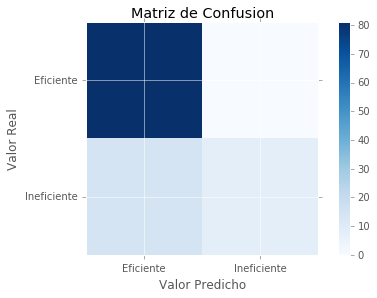

In [23]:
# import confusion matrix to explore model accuracy
from sklearn.metrics import confusion_matrix
# compute confusion matrix
cm = confusion_matrix(label_binary, y_pred)
np.set_printoptions(precision=2)
print('Matriz de Confusión, sin normalización')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# 4. Export data and models to RStudio
We built a 
_[Shiny app](https://ibmdatascience.shinyapps.io/SparkSummitDemo/)_ that summarizes our insights.

### Add credentials for Object Storage container name

1. Click inside the empty cell below to activate it
2. On the right hand data panel, click "Insert to code" under any of the files shown and select "Credentials". 
<div><br><img src="https://raw.githubusercontent.com/IBMDataScience/SparkSummitDemo/master/Screenshots/Screen%20Shot%202016-12-22%20at%201.01.56%20PM.png" width=200 /><br></div>
3. **Now rename the variable that was inserted to be called `credentials`.** This will be referenced in the last code cell to put your data in the right Object Storage container.
4. Run the code cells below to export to a file in your container called `export_data.csv`


In [24]:
# The code was removed by DSX for sharing.

In [28]:
name= "Data"
fileNameOut = 'swift://'+ credentials['container'] + '.' + name + "/export_data.csv"
dfOut.write.format('com.databricks.spark.csv').options(header='true').save(fileNameOut)

Py4JJavaError: An error occurred while calling o227.save.
: org.apache.hadoop.fs.swift.exceptions.SwiftConfigurationException: Missing mandatory configuration option: fs.swift.service.Data.auth.url
	at org.apache.hadoop.fs.swift.http.RestClientBindings.copy(RestClientBindings.java:223)
	at org.apache.hadoop.fs.swift.http.RestClientBindings.bind(RestClientBindings.java:147)
	at org.apache.hadoop.fs.swift.http.SwiftRestClient.<init>(SwiftRestClient.java:540)
	at org.apache.hadoop.fs.swift.http.SwiftRestClient.getInstance(SwiftRestClient.java:1914)
	at org.apache.hadoop.fs.swift.snative.SwiftNativeFileSystemStore.initialize(SwiftNativeFileSystemStore.java:81)
	at org.apache.hadoop.fs.swift.snative.SwiftNativeFileSystem.initialize(SwiftNativeFileSystem.java:129)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2596)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:91)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2630)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2612)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:370)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:296)
	at com.databricks.spark.csv.DefaultSource.createRelation(DefaultSource.scala:167)
	at org.apache.spark.sql.execution.datasources.ResolvedDataSource$.apply(ResolvedDataSource.scala:222)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:148)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:139)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:95)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:55)
	at java.lang.reflect.Method.invoke(Method.java:507)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:785)
